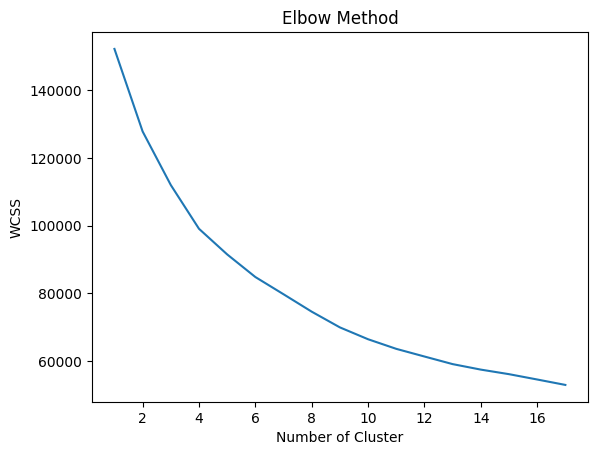

  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000       

In [5]:

# Credit Card Cluster Problem with K-Means
# Importing Preprocessing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Importing Datasets
dataset = pd.read_csv('CCGENERAL.csv')
X = dataset.iloc[:, 1:].values
# Dataset Contains Multiple Missing values
# Replacing Missing Value by Most Repeated/Frequent Number in that column
# Use Imputer with strategy 'most_frequent'
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
X = imputer.fit_transform(X)
# Applying Feature Scaling with StandardScaler
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
# For Finding Optimal Number of Cluster use Elbow Method
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 18):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0).fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 18), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')
plt.show()

# Apply K-Means Again With Optimal Number of Cluster that we got from Elbow method i.e. 8
kmeans = KMeans(n_clusters=8, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)
# Finally, Append new Column i.e Cluster to Actual Dataset
dataset['Cluster'] = y_kmeans
print(dataset.head())